# Actividad: Entrenamiento de redes neuronales



*   Alfredo Romo Osorno | A01643235
*   Jorge Alejandro Gonzales Díaz | Axxxxxxxx
*   Pablo Vargas Cárdenas | Axxxxxxxx



# Ejercicio 1

Implementa el modelo **perceptrón** de una neurona para este [conjunto de datos](https://experiencia21.tec.mx/courses/554073/files/226526780/download?download_frd=1T). Evalúa con **validación cruzada** el rendimiento obtenido con tu modelo.

- Utiliza como esquema de actualización el **descenso de gradiente estocástico** y entrena el modelo durante al menos **50 épocas**.
- Para cada época y cada iteración de la validación cruzada:
  - Guarda el **error de clasificación** calculado con los datos de prueba.
- Al final, grafica el **error promedio vs época** de tu modelo.

In [2]:
#### Libraries Import ####
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
##################################################



# Load txt into DF
data_dir = "./data_1_1.txt"
data_array = np.loadtxt(data_dir)
df = pd.DataFrame(data_array)

# Separate class and predictors
y = df.iloc[:, 0].values      # first column as class
X = df.iloc[:, 1:].values     # remaining columns as predictors
y, X


# Split the dataset into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#map classes to -1,1
y_train = np.where(y_train == 0, -1, 1)
y_test = np.where(y_test == 0, -1, 1)

2025-04-25 15:47:30.585159: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 15:47:30.827181: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-25 15:47:30.937467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745617651.018807    8056 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745617651.037053    8056 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745617651.146787    8056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

/home/fredi/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-04-25 15:48:07.444809: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)



Training with Stochastic Gradient Descent:
Test Loss (SGD): 0.0421, Test Accuracy (SGD): 0.9906


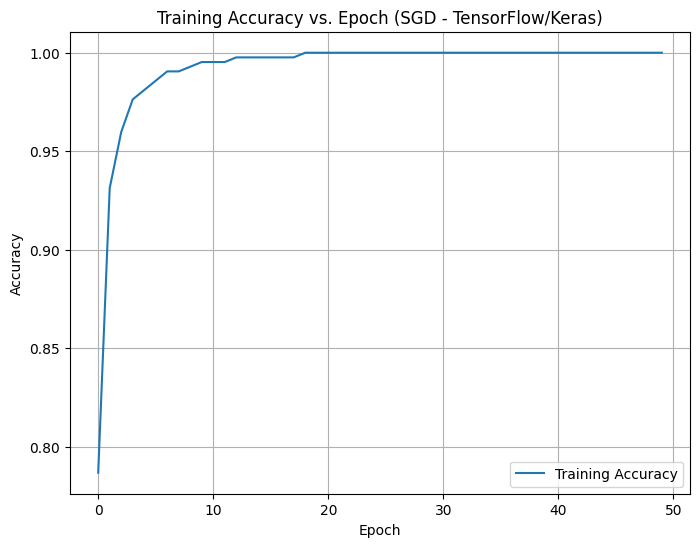

In [3]:
# Stochastic Gradient Descend with TF
# Create model with a single layer, single neuron, sigmoid activation
model_sgd_tf = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])

#Set optimizer as SGD
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model_sgd_tf.compile(optimizer=optimizer_sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Number of Epochs
epochs = 50

print("\nTraining with Stochastic Gradient Descent:")
history_sgd_tf = model_sgd_tf.fit(X_train, y_train, epochs=epochs, verbose=0)
loss_sgd_tf, accuracy_sgd_tf = model_sgd_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (SGD): {loss_sgd_tf:.4f}, Test Accuracy (SGD): {accuracy_sgd_tf:.4f}")

# Plotting accuracy vs epoch (SGD)
plt.figure(figsize=(8, 6))
plt.plot(history_sgd_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (SGD - TensorFlow/Keras)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Parte 2: Descenso por lote y mini-lote

Repite el paso anterior utilizando:
- **Descenso de gradiente por lote**.
- **Descenso de gradiente por mini-lote**.


Training with Batch Gradient Descent:
Test Loss (Batch): 0.1645, Test Accuracy (Batch): 0.9340


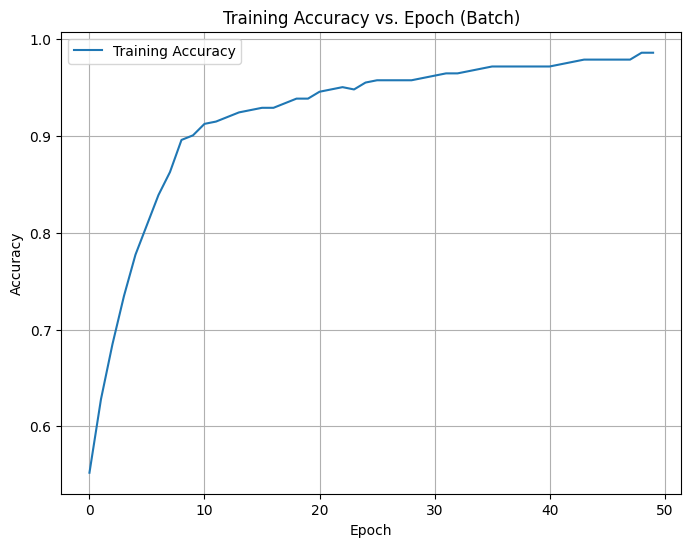

In [4]:
# Batch Gradient Descent
model_batch_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
optimizer_batch = tf.keras.optimizers.SGD(learning_rate=0.1)
model_batch_tf.compile(optimizer=optimizer_batch, loss='binary_crossentropy', metrics=['accuracy'])
batch_size = len(X_train)
print("\nTraining with Batch Gradient Descent:")
history_batch_tf = model_batch_tf.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
loss_batch_tf, accuracy_batch_tf = model_batch_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Batch): {loss_batch_tf:.4f}, Test Accuracy (Batch): {accuracy_batch_tf:.4f}")

# Plotting accuracy vs epoch (Batch)
plt.figure(figsize=(8, 6))
plt.plot(history_batch_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (Batch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with Mini-Batch Gradient Descent:
Test Loss (Mini-Batch): 0.0300, Test Accuracy (Mini-Batch): 1.0000


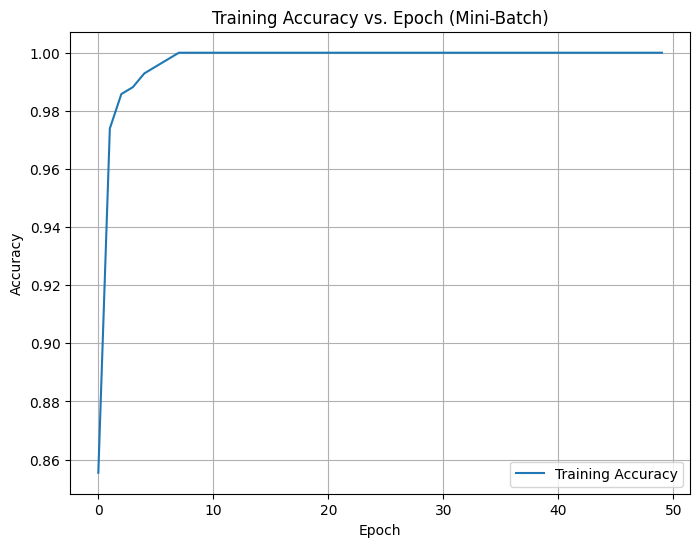

In [5]:
# 3. Mini-Batch Gradient Descent
model_minibatch_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
])
optimizer_minibatch = tf.keras.optimizers.SGD(learning_rate=0.1)
model_minibatch_tf.compile(optimizer=optimizer_minibatch, loss='binary_crossentropy', metrics=['accuracy'])
batch_size_minibatch = 16
print("\nTraining with Mini-Batch Gradient Descent:")
history_minibatch_tf = model_minibatch_tf.fit(X_train, y_train, epochs=epochs, batch_size=batch_size_minibatch, verbose=0)
loss_minibatch_tf, accuracy_minibatch_tf = model_minibatch_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Mini-Batch): {loss_minibatch_tf:.4f}, Test Accuracy (Mini-Batch): {accuracy_minibatch_tf:.4f}")

# Plotting accuracy vs epoch (Mini-Batch)
plt.figure(figsize=(8, 6))
plt.plot(history_minibatch_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (Mini-Batch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## Parte 3: Modelo SVM

Repite todo lo anterior, pero utilizando la **regla de aprendizaje para el modelo SVM** con una neurona.



Training SVM with Stochastic Gradient Descent:
Test Loss (SGD SVM): 0.0604, Test Accuracy (SGD SVM): 0.9528


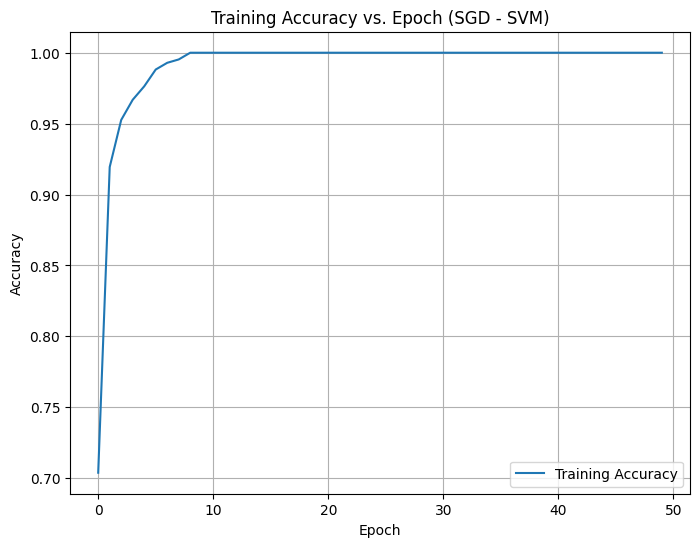

In [6]:
# Create model with a single layer, single neuron, linear activation (no non-linearity) for SVM
model_sgd_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],))
])

# Set optimizer as SGD
optimizer_sgd = tf.keras.optimizers.SGD(learning_rate=0.1)

# Compile with hinge loss (for SVM)
model_sgd_tf.compile(optimizer=optimizer_sgd, loss='hinge', metrics=['accuracy'])

# Number of Epochs
epochs = 50

print("\nTraining SVM with Stochastic Gradient Descent:")
history_sgd_tf = model_sgd_tf.fit(X_train, y_train, epochs=epochs, verbose=0)

# Evaluate on test data
loss_sgd_tf, accuracy_sgd_tf = model_sgd_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (SGD SVM): {loss_sgd_tf:.4f}, Test Accuracy (SGD SVM): {accuracy_sgd_tf:.4f}")

# Plotting accuracy vs epoch (SGD - SVM)
plt.figure(figsize=(8, 6))
plt.plot(history_sgd_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (SGD - SVM)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with Batch Gradient Descent (TensorFlow/Keras):
Test Loss (Batch): 0.0658, Test Accuracy (Batch): 0.9623


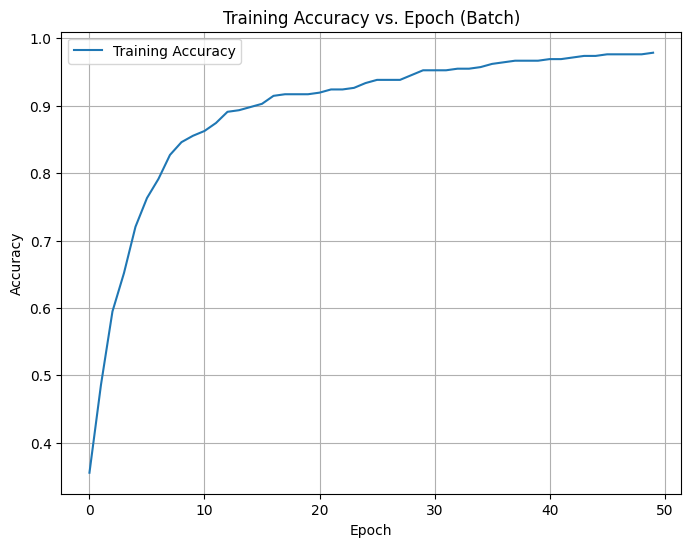

In [7]:
# Batch Gradient Descent SVM
model_batch_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],))
])
optimizer_batch = tf.keras.optimizers.SGD(learning_rate=0.1)
model_batch_tf.compile(optimizer=optimizer_batch, loss='hinge', metrics=['accuracy'])
batch_size = len(X_train)
print("\nTraining with Batch Gradient Descent (TensorFlow/Keras):")
history_batch_tf = model_batch_tf.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
loss_batch_tf, accuracy_batch_tf = model_batch_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Batch): {loss_batch_tf:.4f}, Test Accuracy (Batch): {accuracy_batch_tf:.4f}")

# Plotting accuracy vs epoch (Batch)
plt.figure(figsize=(8, 6))
plt.plot(history_batch_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (Batch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Training with Mini-Batch Gradient Descen:
Test Loss (Mini-Batch): 0.0468, Test Accuracy (Mini-Batch): 0.9434


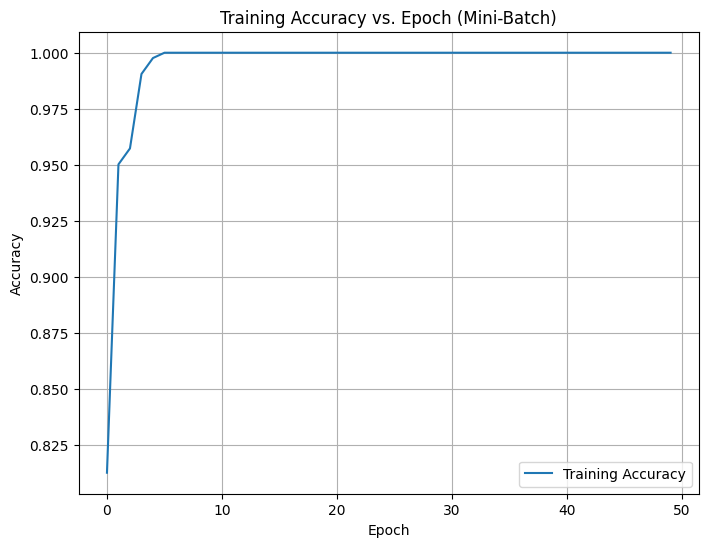

In [8]:
# Mini-Batch Gradient Descent SVM
model_minibatch_tf = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='linear', input_shape=(X_train.shape[1],))
])
optimizer_minibatch = tf.keras.optimizers.SGD(learning_rate=0.1)
model_minibatch_tf.compile(optimizer=optimizer_minibatch, loss='hinge', metrics=['accuracy'])
batch_size_minibatch = 16
print("\nTraining with Mini-Batch Gradient Descen:")
history_minibatch_tf = model_minibatch_tf.fit(X_train, y_train, epochs=epochs, batch_size=batch_size_minibatch, verbose=0)
loss_minibatch_tf, accuracy_minibatch_tf = model_minibatch_tf.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss (Mini-Batch): {loss_minibatch_tf:.4f}, Test Accuracy (Mini-Batch): {accuracy_minibatch_tf:.4f}")

# Plotting accuracy vs epoch (Mini-Batch)
plt.figure(figsize=(8, 6))
plt.plot(history_minibatch_tf.history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy vs. Epoch (Mini-Batch)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
